In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

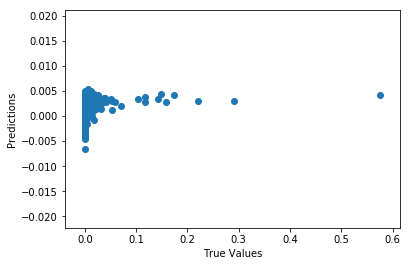

[ -2.31990107e-06  -1.62889479e-03   1.18925422e-01  -1.33375392e-05
  -3.11181990e-06  -1.50694334e-02   1.05199526e-02   3.05768055e-01
  -2.62705494e-02   6.67134011e-07  -3.36569465e-07   8.49319256e-08
   8.26728707e-07  -4.24282177e-03  -1.40205521e-04   1.71181109e-03
   9.71896411e-04   2.51394286e-01   2.61695388e-02   7.91112228e-03
   1.66935734e-03  -3.68934628e-01  -1.28162778e+00  -1.14715420e-04
  -2.30926765e-06   2.73505637e-05  -3.22171343e-07   4.59788626e-07
  -2.66110503e-07   4.16008397e-08]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ -4.43144639e+00  -1.18112870e-01  -1.46984837e-02  -3.86190442e-03]


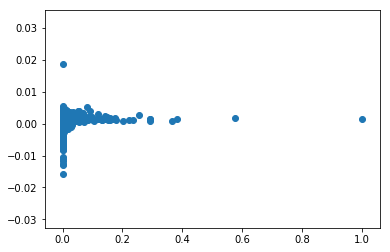

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: -0.00362038019395


In [9]:
print(lm.coef_)

[ -2.31990107e-06  -1.62889479e-03   1.18925422e-01  -1.33375392e-05
  -3.11181990e-06  -1.50694334e-02   1.05199526e-02   3.05768055e-01
  -2.62705494e-02   6.67134011e-07  -3.36569465e-07   8.49319256e-08
   8.26728707e-07  -4.24282177e-03  -1.40205521e-04   1.71181109e-03
   9.71896411e-04   2.51394286e-01   2.61695388e-02   7.91112228e-03
   1.66935734e-03  -3.68934628e-01  -1.28162778e+00  -1.14715420e-04
  -2.30926765e-06   2.73505637e-05  -3.22171343e-07   4.59788626e-07
  -2.66110503e-07   4.16008397e-08]
